In [2]:
# Install kaggle library
!pip install kaggle -q

# Download dataset directly
!wget -q https://raw.githubusercontent.com/treselle-systems/customer_churn_analysis/master/WA_Fn-UseC_-Telco-Customer-Churn.csv

# If that doesn't work, use this alternative:
!wget -q https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv

# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Try to load
try:
    df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("Loaded: WA_Fn-UseC_-Telco-Customer-Churn.csv")
except:
    df = pd.read_csv('Telco-Customer-Churn.csv')
    print("Loaded: Telco-Customer-Churn.csv")

# Show info
print(f"\nDataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
df.head()

Loaded: WA_Fn-UseC_-Telco-Customer-Churn.csv

Dataset shape: (7043, 21)

Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Basic statistics
print("=== CHURN DISTRIBUTION ===")
print(df['Churn'].value_counts())
print(f"\nChurn Rate: {df['Churn'].value_counts(normalize=True)['Yes']:.2%}")

print("\n=== NUMERIC COLUMNS SUMMARY ===")
print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

print("\n=== MISSING VALUES ===")
print(df.isnull().sum().sum(), "total missing values")

=== CHURN DISTRIBUTION ===
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Rate: 26.54%

=== NUMERIC COLUMNS SUMMARY ===
            tenure  MonthlyCharges
count  7043.000000     7043.000000
mean     32.371149       64.761692
std      24.559481       30.090047
min       0.000000       18.250000
25%       9.000000       35.500000
50%      29.000000       70.350000
75%      55.000000       89.850000
max      72.000000      118.750000

=== MISSING VALUES ===
0 total missing values


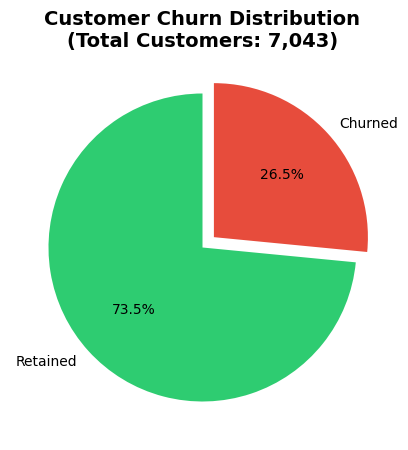

Churn Rate: 26.5%


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
churn_counts = df['Churn'].value_counts()
colors = ['#2ecc71', '#e74c3c']  # Green=No, Red=Yes
plt.pie(churn_counts.values, labels=['Retained', 'Churned'], autopct='%1.1f%%',
        colors=colors, startangle=90, explode=(0, 0.1))
plt.title('Customer Churn Distribution\n(Total Customers: 7,043)', fontsize=14, fontweight='bold')
plt.savefig('churn_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"Churn Rate: {churn_counts['Yes']/len(df)*100:.1f}%")

<Figure size 1000x600 with 0 Axes>

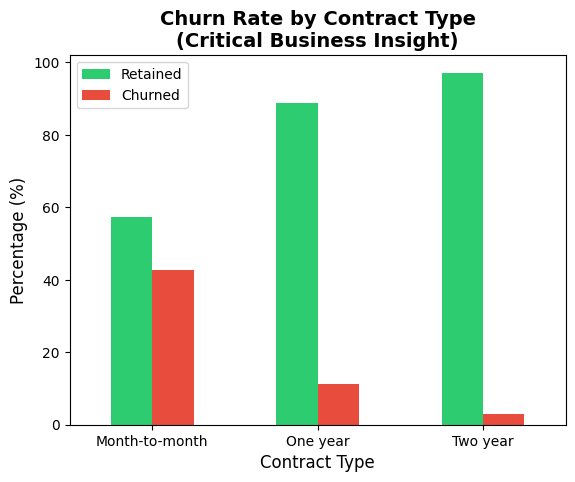

Churn rates by contract:
Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Yes, dtype: float64


In [5]:
plt.figure(figsize=(10, 6))
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Churn Rate by Contract Type\n(Critical Business Insight)', fontsize=14, fontweight='bold')
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(['Retained', 'Churned'])
plt.xticks(rotation=0)
plt.savefig('churn_by_contract.png', dpi=300, bbox_inches='tight')
plt.show()

# Print exact numbers
print("Churn rates by contract:")
print(contract_churn['Yes'].sort_values(ascending=False))

/tmp/ipython-input-1441121791.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette=['#2ecc71', '#e74c3c'])


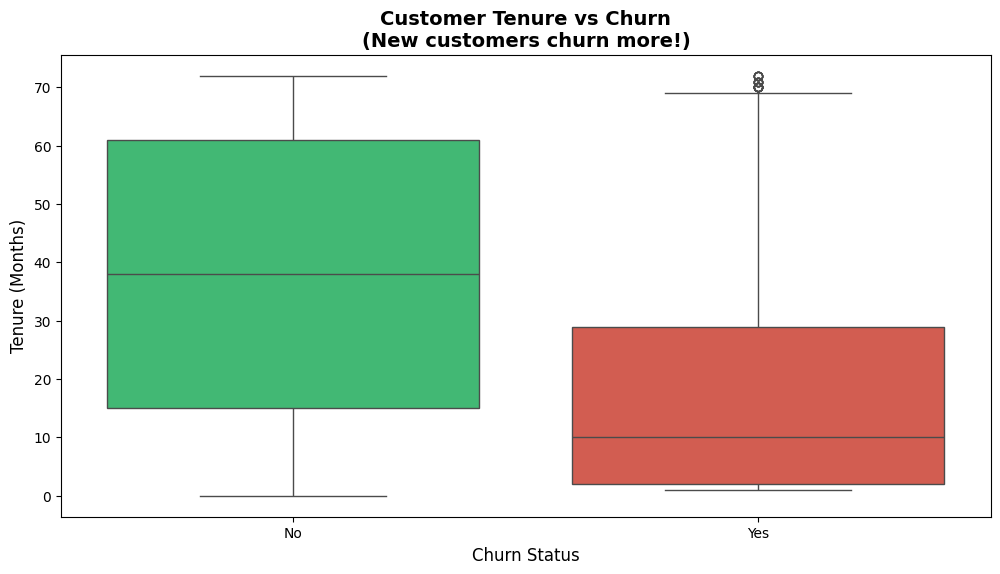


Avg tenure - Retained: 37.6 months
Avg tenure - Churned: 18.0 months


In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='tenure', data=df, palette=['#2ecc71', '#e74c3c'])
plt.title('Customer Tenure vs Churn\n(New customers churn more!)', fontsize=14, fontweight='bold')
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Tenure (Months)', fontsize=12)
plt.savefig('churn_by_tenure.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nAvg tenure - Retained: {df[df['Churn']=='No']['tenure'].mean():.1f} months")
print(f"Avg tenure - Churned: {df[df['Churn']=='Yes']['tenure'].mean():.1f} months")

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prepare data
df_model = df.copy()

# Encode categorical variables
le = LabelEncoder()
categorical_cols = df_model.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'customerID':
        df_model[col] = le.fit_transform(df_model[col])

# Features and target
X = df_model.drop(['customerID', 'Churn'], axis=1)
y = df_model['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Results
print("=== MODEL PERFORMANCE ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Retained', 'Churned']))

=== MODEL PERFORMANCE ===
Accuracy: 79.84%

Classification Report:
              precision    recall  f1-score   support

    Retained       0.83      0.91      0.87      1036
     Churned       0.66      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



/tmp/ipython-input-2156002945.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importances.head(10), palette='viridis')


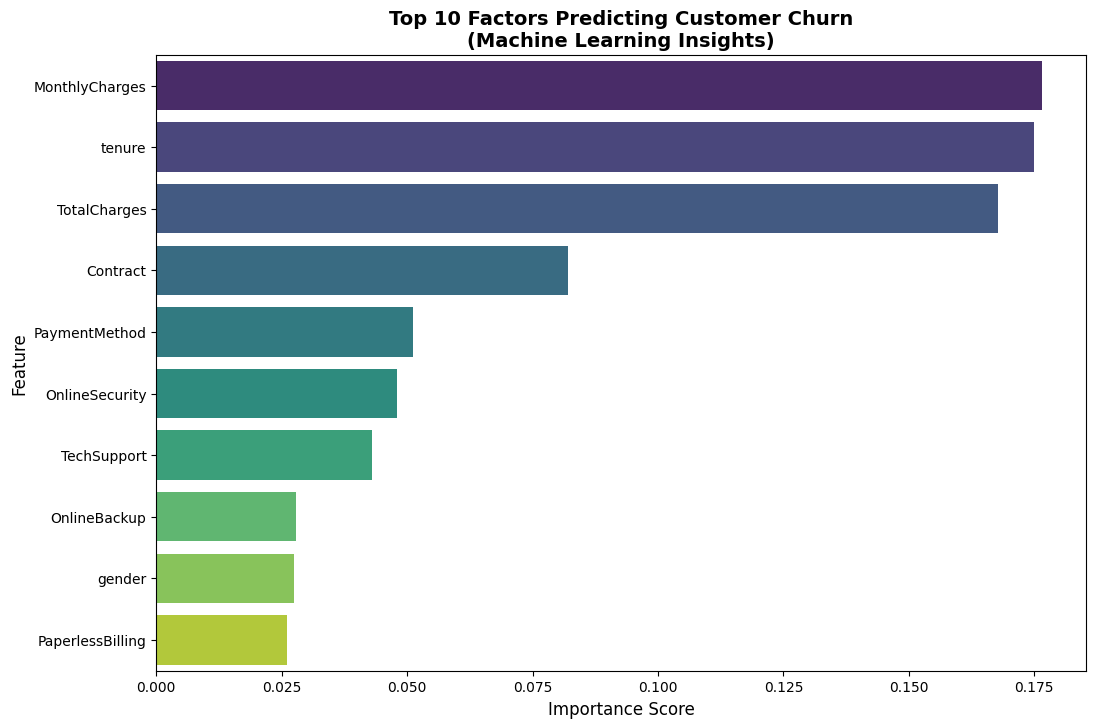

Top 5 churn predictors:
           feature  importance
17  MonthlyCharges    0.176539
4           tenure    0.174955
18    TotalCharges    0.167721
14        Contract    0.081976
16   PaymentMethod    0.051153


In [8]:
# Feature importance
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importances.head(10), palette='viridis')
plt.title('Top 10 Factors Predicting Customer Churn\n(Machine Learning Insights)', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("Top 5 churn predictors:")
print(importances.head(5))

In [9]:
print("=== BUSINESS RECOMMENDATIONS ===")
print("\n1. CONTRACT STRATEGY:")
print("   - Month-to-month customers have highest churn risk")
print("   - Offer incentives to switch to 1-year or 2-year contracts")

print("\n2. NEW CUSTOMER RETENTION:")
print("   - First 18 months are critical (churned avg: 18 months vs retained: 37.6)")
print("   - Implement onboarding program for new customers")

print("\n3. TOP CHURN INDICATORS TO MONITOR:")
for i, row in importances.head(3).iterrows():
    print(f"   - {row['feature']}: {row['importance']:.3f} importance score")

print(f"\n4. MODEL DEPLOYMENT:")
print(f"   - Use this model to predict at-risk customers")
print(f"   - Proactive retention campaigns can reduce {len(df[df['Churn']=='Yes'])} annual churns")

=== BUSINESS RECOMMENDATIONS ===

1. CONTRACT STRATEGY:
   - Month-to-month customers have highest churn risk
   - Offer incentives to switch to 1-year or 2-year contracts

2. NEW CUSTOMER RETENTION:
   - First 18 months are critical (churned avg: 18 months vs retained: 37.6)
   - Implement onboarding program for new customers

3. TOP CHURN INDICATORS TO MONITOR:
   - MonthlyCharges: 0.177 importance score
   - tenure: 0.175 importance score
   - TotalCharges: 0.168 importance score

4. MODEL DEPLOYMENT:
   - Use this model to predict at-risk customers
   - Proactive retention campaigns can reduce 1869 annual churns
